In [1]:
import pandas as pd
import numpy as np

In [167]:
x_train = pd.read_csv('../data/split/train/x_train.csv',index_col=0)
y_train = pd.read_csv('../data/split/train/y_train.csv',index_col=0)

In [182]:
from sklearn.decomposition import IncrementalPCA,PCA
from sklearn.cluster import KMeans,DBSCAN,MiniBatchKMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [183]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_train,y_train)

pred = tree.predict(x_train)
r2_score(y_train,pred)

0.734072063779604

In [184]:
scale = StandardScaler()
x_s = scale.fit_transform(x)

In [186]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x_s,y_train)

pred = tree.predict(x_s)
r2_score(y_train,pred)

0.4240684238977276

In [175]:
pca = PCA(0.95)
pca.fit(x_s)

len(pca.components_) # find number of component for 95 %variation
                        # then use IncrementalPCA

118

In [178]:
pca = IncrementalPCA(118)
pca.fit(x_s)

IncrementalPCA(n_components=118)

In [179]:
x = pca.transform(x_s)
x.shape

(26738, 118)

In [187]:
tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x,y_train)

pred = tree.predict(x)
r2_score(y_train,pred)

0.4240684238977276

In [188]:
pca = PCA(0.95)
pca.fit(x_train)

x = pca.transform(x_train)

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x,y_train)

pred = tree.predict(x)
r2_score(y_train,pred)

0.6791428651343303

In [189]:
kmean = KMeans(n_clusters=8)
kmean.fit(x_s)

KMeans()

In [190]:
x = kmean.transform(x_s)

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x,y_train)

pred = tree.predict(x)
r2_score(y_train,pred)

0.13245916767104204

In [66]:
dd = pd.DataFrame()

dd['kmean'] =kmean.labels_


In [67]:
x.shape

(26738, 100)

In [68]:
kmean.transform(x).shape # transform to centroid

(26738, 8)

In [69]:
kmean.cluster_centers_.shape

(8, 100)

In [70]:
kmean.predict(x)

array([7, 7, 7, ..., 7, 7, 7], dtype=int32)

In [110]:
db = DBSCAN(eps=10,min_samples=15)
db.fit(x_s)

DBSCAN(eps=10, min_samples=15)

In [111]:
np.unique(db.labels_) # -1 mean outlier

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9])

In [112]:
dd['db'] = db.labels_

In [113]:
len(db.labels_)

26738

In [114]:
len(db.core_sample_indices_) # which index r not -1

23535

In [115]:
x_s.shape

(26738, 100)

In [88]:
db.components_.shape

(25927, 100)

In [14]:
from sklearn.manifold import TSNE

In [89]:
tsne = TSNE()
tsne.fit(x_s)

/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


TSNE()

In [90]:
xx = tsne.embedding_
xx.shape

(26738, 2)

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

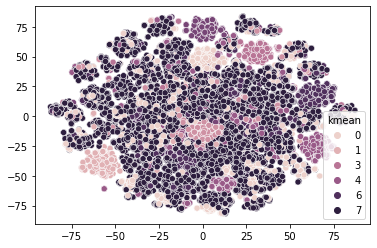

In [92]:
sns.scatterplot(x=xx[:,0],y=xx[:,1],hue= dd['kmean'])

<AxesSubplot:>

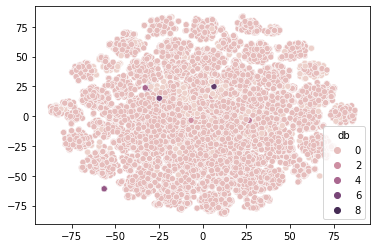

In [116]:
sns.scatterplot(x=xx[:,0],y=xx[:,1],hue= dd['db'])

<AxesSubplot:>

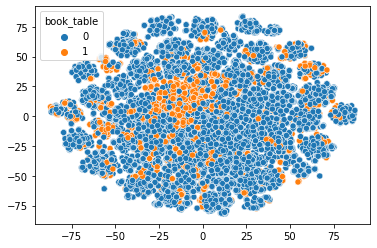

In [164]:
sns.scatterplot(x=xx[:,0],y=xx[:,1],hue= x_train['book_table'])

In [117]:
# making a classifier to find ourliers using DBSCAN

data = x_s.copy()
y = dd['db']

In [119]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(data,y)

DecisionTreeClassifier(max_depth=3)

In [120]:
pred = tree.predict(data)

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y,pred))

              precision    recall  f1-score   support

          -1       0.67      0.38      0.48      1166
           0       0.97      0.99      0.98     25410
           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        18
           4       1.00      0.58      0.73        33
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        17
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        17

    accuracy                           0.96     26738
   macro avg       0.24      0.18      0.20     26738
weighted avg       0.95      0.96      0.95     26738



/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/rahul/anacond/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# class predicted as -1 are outliers

In [122]:
#  SOFT CLUSTERING

from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

In [194]:
gauss = GaussianMixture(n_components=5)
gauss.fit(x_s)

GaussianMixture(n_components=5)

In [195]:
gauss.means_.shape

(5, 118)

In [196]:
gauss.predict_proba(x_s) # prob of them belonging to 5 component

array([[0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.31155960e-083],
       [0.00000000e+000, 6.24699716e-029, 1.00000000e+000,
        0.00000000e+000, 1.57765836e-073],
       [5.85414393e-038, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 5.38637189e-079],
       ...,
       [0.00000000e+000, 1.48961932e-284, 0.00000000e+000,
        1.00000000e+000, 8.23528732e-023],
       [1.23186077e-018, 1.00000000e+000, 4.53688792e-100,
        0.00000000e+000, 1.00091012e-044],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.00000000e+000]])

In [197]:
gauss.predict(x_s)

array([1, 2, 2, ..., 3, 1, 4])

In [198]:
gauss.weights_

array([0.13471776, 0.21634266, 0.35412243, 0.15980451, 0.13501265])

In [199]:
gauss.covariances_.shape

(5, 118, 118)

In [200]:
x = gauss.predict_proba(x_s)

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(x,y_train)

pred = tree.predict(x)
r2_score(y_train,pred)

0.12439611839334774

In [130]:
bayes = BayesianGaussianMixture(n_components=5)
bayes.fit(x_s)

BayesianGaussianMixture(n_components=5)

In [131]:
bayes.weights_

array([0.01716594, 0.12178881, 0.46951435, 0.28900195, 0.10252895])

In [133]:
# LDA 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [136]:
x_train['book_table']

11712    0
44598    0
29649    0
5260     0
32568    0
        ..
5689     0
5230     0
550      0
29525    0
38646    1
Name: book_table, Length: 26738, dtype: int64

In [144]:
np.c_[x_s,x_train['book_table'].to_numpy().reshape(-1,1)]

array([[-1.08592906,  1.42229562,  0.12122311, ..., -2.76424693,
        -1.66143149,  0.        ],
       [-1.12204076, -1.33624088, -0.40101082, ...,  0.32950308,
        -0.34708674,  0.        ],
       [ 0.35227705,  1.4520164 ,  0.98483228, ...,  0.1966691 ,
         0.44896547,  0.        ],
       ...,
       [-0.60210868, -0.58370552, -1.59032905, ...,  1.02704419,
        -0.10003713,  0.        ],
       [-1.60964874,  2.02436522,  0.3527155 , ...,  1.05500444,
        -0.258585  ,  0.        ],
       [ 1.77998462, -0.4703814 , -1.09433109, ..., -1.655686  ,
         1.04582288,  1.        ]])

In [156]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_s,x_train['book_table'].to_numpy())

LinearDiscriminantAnalysis()

In [157]:
lda.classes_

array([0, 1])

In [158]:
lda.coef_.shape

(1, 100)

In [159]:
lda.explained_variance_ratio_

array([1.])

In [160]:
lda.means_.shape

(2, 100)

In [161]:
lda.intercept_

array([-15696.47272362])

In [162]:
lda.transform(x_s)

array([[-33.14808464],
       [-33.24295059],
       [-33.49735612],
       ...,
       [-32.84485499],
       [-31.4318435 ],
       [181.93756026]])

In [163]:
lda.predict(x_s)

array([0, 0, 0, ..., 0, 0, 1])